In [26]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score

  Using cached Pygments-2.13.0-py3-none-any.whl (1.1 MB)
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.2.0
    Uninstalling Pygments-2.2.0:
      Successfully uninstalled Pygments-2.2.0


In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X=iris.data
y=iris.target
print(iris)
print(X, y)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1, stratify=y)
print((np.bincount(y),np.bincount(y_train),np.bincount(y_test)))

(array([50, 50, 50]), array([35, 35, 35]), array([15, 15, 15]))


In [14]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
start_time=time.time()
svm.fit(X_train, y_train)
print('Training time: %f'%(time.time() - start_time))
start_time=time.time()
y_pred_svm = svm.predict(X_test)
print('Prediction time: %f'%(time.time() - start_time))
print('Missclassified examples: %d'% (y_test != y_pred_svm).sum())
print('Accuracy: %.3f' % accuracy_score(y_test,y_pred_svm))

Training time: 0.041972
Prediction time: 0.007947
Missclassified examples: 1
Accuracy: 0.978


In [15]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)
start_time=time.time()
forest.fit(X_train,y_train)
print('Training time: %f'%(time.time() - start_time))
start_time=time.time()
y_pred_forest = forest.predict(X_test)
print('Prediction time: %f'%(time.time() - start_time))
print('Missclassified examples: %d'% (y_test != y_pred_forest).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_forest))

Training time: 0.390085
Prediction time: 0.020920
Missclassified examples: 1
Accuracy: 0.978


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
start_time=time.time()
knn.fit(X_train, y_train)
print('Training time: %f'%(time.time() - start_time))
start_time=time.time()   
y_pred_knn = knn.predict(X_test)
print('Prediction time: %f'%(time.time() - start_time))
print('Missclassified examples: %d'% (y_test != y_pred_knn).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_knn))

Training time: 0.034651
Prediction time: 0.026403
Missclassified examples: 1
Accuracy: 0.978


In [27]:
from sklearn.datasets import fetch_openml
print('a1')     # per vedere dove is blocca
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
#X = ((X/255.)-0.5)*2
X = X/255.
print('a')      # per vedere dove is blocca

a1
a


In [28]:
X=X.to_numpy()
y=y.to_numpy()

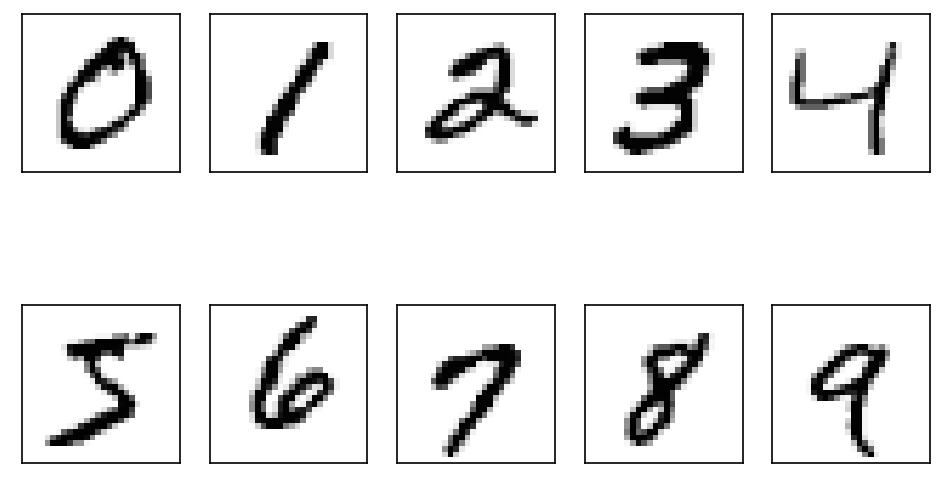

In [29]:
fig,ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,dpi=150)
ax = ax.flatten()
for i in range(10):
    img = X[y==i][0].reshape(28,28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

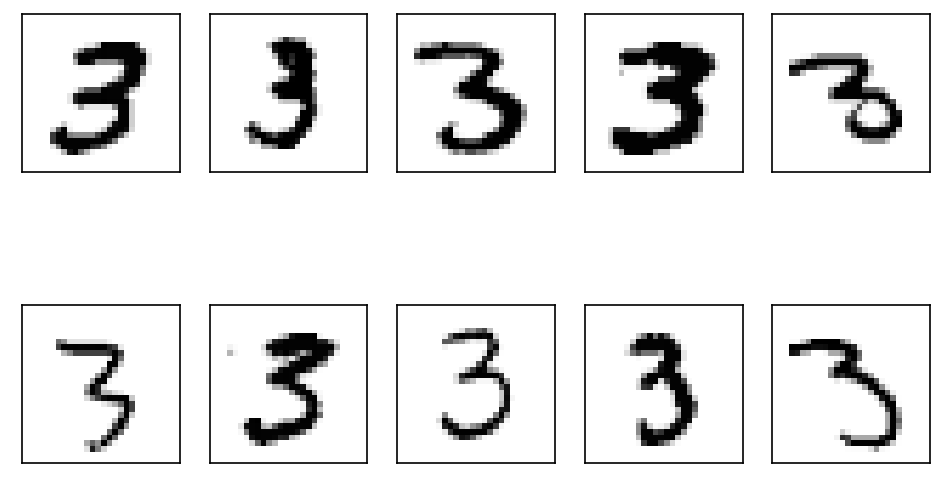

In [30]:
fig,ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,dpi=150)
ax = ax.flatten()
for i in range(10):
    img = X[y==3][i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1, stratify=y)
print((np.bincount(y),np.bincount(y_train),np.bincount(y_test)))

(array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]), array([4832, 5514, 4893, 4999, 4777, 4419, 4813, 5105, 4777, 4871]), array([2071, 2363, 2097, 2142, 2047, 1894, 2063, 2188, 2048, 2087]))


In [32]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
start_time=time.time()
svm.fit(X_train, y_train)
print('Training time: %f'%(time.time() - start_time))
start_time=time.time()
y_pred_svm = svm.predict(X_test)
print('Prediction time: %f'%(time.time() - start_time))
print('Missclassified examples: %d'% (y_test != y_pred_svm).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_svm))

Training time: 224.532909
Prediction time: 100.336136
Missclassified examples: 1357
Accuracy: 0.935


In [33]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)
start_time=time.time()
forest.fit(X_train,y_train)
print('Training time: %f'%(time.time() - start_time))
start_time=time.time()
y_pred_forest = forest.predict(X_test)
print('Prediction time: %f'%(time.time() - start_time))
print('Missclassified examples: %d'% (y_test != y_pred_forest).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_forest))

Training time: 9.603872
Prediction time: 0.499547
Missclassified examples: 823
Accuracy: 0.961


In [34]:
class Naive_Bayes_Bernoulli:
    def fit(self, X, y):
        self.models=[]
        self.freq=[]
        self.classes = np.unique(y)
        for c in self.classes:
            self.freq.append( (y==c).sum() / y.shape[0] )
            self.models.append( X[y==c].mean(axis=0))
    
    def predict(self, X):
        size = X.shape[0]
        y = np.zeros(size, dtype=self.classes.dtype)
        probs = np.zeros(len(self.classes))
        for i in range(size):
            max_prob=0
            max_c=0
            for c in range(len(self.classes)): 
                cond_P =(self.models[c]*(X[i]>=0.5) + (1-self.models[c])*(X[i]<0.5)).prod()
                probs[c] = cond_P * self.freq[c]
                if probs[c]>max_prob:
                    max_prob = probs[c]
                    max_c = c
            y[i] = self.classes[max_c]
        return y

In [35]:
nbb = Naive_Bayes_Bernoulli()
start_time=time.time()
nbb.fit(X_train, y_train) 
print('Training time: %f'%(time.time() - start_time))
start_time=time.time()   
y_pred_nbb = nbb.predict(X_test)
print('Prediction time: %f'%(time.time() - start_time))
print('Missclassified examples: %d'% (y_test != y_pred_nbb).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_nbb))

Training time: 0.944925
Prediction time: 6.074292
Missclassified examples: 3496
Accuracy: 0.834


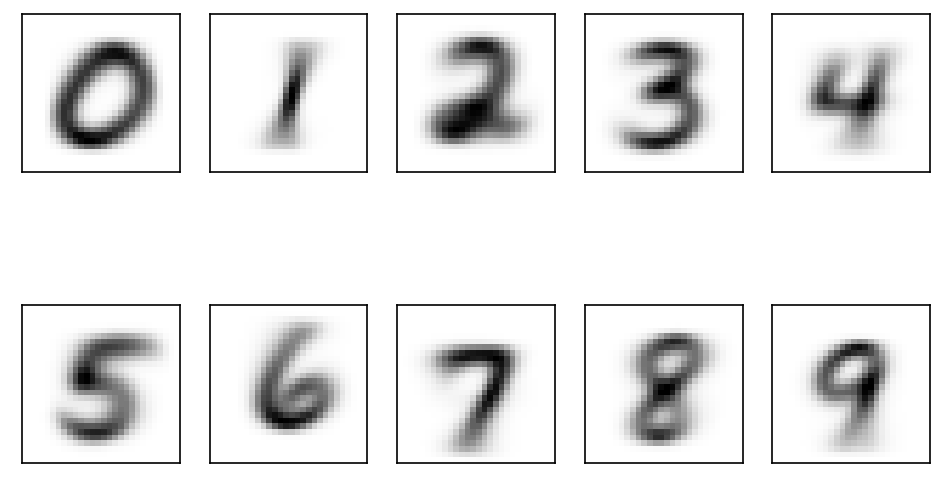

In [36]:
fig,ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,dpi=150)
ax = ax.flatten()
for i in range(10):
    img = nbb.models[i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
start_time=time.time()
knn.fit(X_train, y_train)
print('Training time: %f'%(time.time() - start_time))
start_time=time.time()   
y_pred_knn = knn.predict(X_test)
print('Prediction time: %f'%(time.time() - start_time))
print('Missclassified examples: %d'% (y_test != y_pred_knn).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_knn))

Training time: 1.007817
Prediction time: 95.247217
Missclassified examples: 615
Accuracy: 0.971
